<a href="https://colab.research.google.com/github/lukavujeva/ast425/blob/main/Marchal_et_al_2022b_forpaper_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mapping a lower limit on the mass fraction of the cold neutral medium using Fourier transformed HI 21cm emission line spectra



In [1]:
!pip install ROHSApy
!pip install marchalib -U
!pip install fBms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 75.0 MB/s eta 0:00:00


In [2]:
#!wget https://www.cita.utoronto.ca/GHIGLS/FITS/GHIGLS_UMAEAST_Tb.fits

!wget https://www.cita.utoronto.ca/~vujeva/GHIGLS_NCPL_Tb_CNM_IVC_n6_final.fits
!wget https://www.cita.utoronto.ca/~vujeva/GHIGLS_NCPL_Tb_WNM_IVC_n6_final.fits

!wget https://www.cita.utoronto.ca/~vujeva/GHIGLS_NCPL_Tb_INPAINTEDFILTERED.fits

--2023-07-28 18:02:38--  https://www.cita.utoronto.ca/~vujeva/GHIGLS_NCPL_Tb_CNM_IVC_n6_final.fits
Resolving www.cita.utoronto.ca (www.cita.utoronto.ca)... 128.100.76.81
Connecting to www.cita.utoronto.ca (www.cita.utoronto.ca)|128.100.76.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9852480 (9.4M)
Saving to: ‘GHIGLS_NCPL_Tb_CNM_IVC_n6_final.fits’

GHIGLS_NCPL_Tb_CNM_ 100%[===================>]   9.40M  32.1MB/s    in 0.3s    

2023-07-28 18:02:40 (32.1 MB/s) - ‘GHIGLS_NCPL_Tb_CNM_IVC_n6_final.fits’ saved [9852480/9852480]

--2023-07-28 18:02:40--  https://www.cita.utoronto.ca/~vujeva/GHIGLS_NCPL_Tb_WNM_IVC_n6_final.fits
Resolving www.cita.utoronto.ca (www.cita.utoronto.ca)... 128.100.76.81
Connecting to www.cita.utoronto.ca (www.cita.utoronto.ca)|128.100.76.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9852480 (9.4M)
Saving to: ‘GHIGLS_NCPL_Tb_WNM_IVC_n6_final.fits’

GHIGLS_NCPL_Tb_WNM_ 100%[===================>]   9.40M  2

In [8]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from tqdm import tqdm
from numpy.fft import rfftn

from ROHSApy import ROHSA
import marchalib as ml

from astropy import wcs
from skimage.draw import polygon2mask
from skimage.draw import polygon

# name = "CNM"
fitsname1 = "GHIGLS_NCPL_Tb_CNM_IVC_n6_final.fits"

fitsname2 = "GHIGLS_NCPL_Tb_WNM_IVC_n6_final.fits"

fitsname3 = 'GHIGLS_NCPL_Tb_INPAINTEDFILTERED.fits'

hdu1 = fits.open(fitsname1)
hdr1 = hdu1[0].header
data1 = hdu1[0].data

hdu2 = fits.open(fitsname2)
hdr2 = hdu2[0].header
data2 = hdu2[0].data

hdu3 = fits.open(fitsname3)
hdr3 = hdu3[0].header
data3 = hdu3[0].data[0]


#for cube

hdr3['CRPIX1'] -= 197
hdr3['CRPIX2'] -= 246
hdr3['CRPIX3'] -= 215 + 85

cube = hdu3[0].data[0][215:369,246:374, 197:325]
cube = cube[85:, :, :]

CRVAL = hdr3['CRVAL3']
CDELT = hdr3['CDELT3']
CRPIX = hdr3['CRPIX3']

def wcs2D(hdr):
    w = wcs.WCS(naxis=2)
    w.wcs.crpix = [hdr['CRPIX1'], hdr['CRPIX2']]
    w.wcs.cdelt = np.array([hdr['CDELT1'], hdr['CDELT2']])
    w.wcs.crval = [hdr['CRVAL1'], hdr['CRVAL2']]
    w.wcs.ctype = [hdr['CTYPE1'], hdr['CTYPE2']]
    return w
w = wcs2D(hdr3)

# cube = data1+data2 #+cubetot

core = ROHSA(cube, hdr1)

In [9]:
#Get sub velocity range
v = core.v
dv = np.abs(hdr1["CDELT3"]*1.e-3)
vmin = -82
vmax = -27
idvmax = np.where((v > vmin) & (v < vmax))[0][::-1][0]
idvmin = np.where((v > vmin) & (v < vmax))[0][0]
#
subv = v[idvmin:idvmax]
# cube = data

NHI = np.sum(cube,0) * dv * 1.82243e+18 / 1.e19
NHI_cnmmodel = np.sum(data1,0) * dv * 1.82243e+18 / 1.e19
NHI_totalmodel = np.sum(data1,0) * dv * 1.82243e+18 / 1.e19 + np.sum(data2,0) * dv * 1.82243e+18 / 1.e19

NameError: ignored

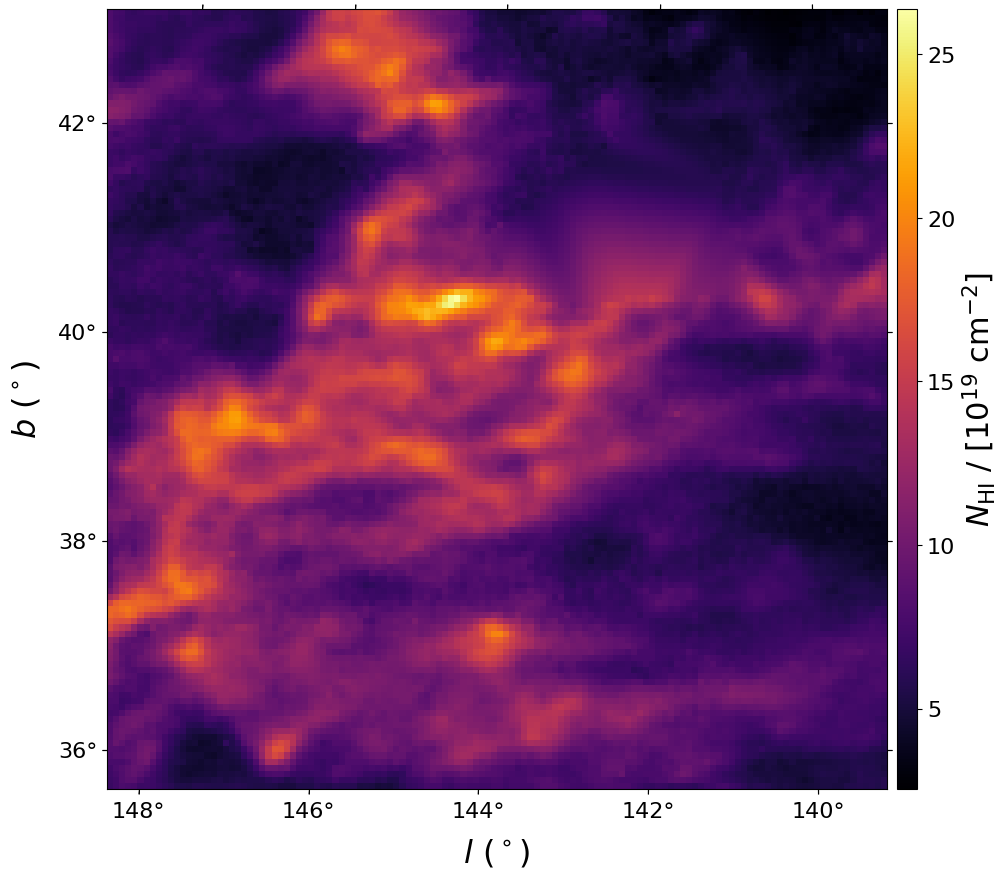

In [11]:
#Plot total column density map


#Plot integrated column density field TOT


fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1,0.1,0.78,0.8], projection=w)
ax.set_xlabel(r"$l \ (^\circ)$", fontsize=23.)
ax.set_ylabel(r"$b\ (^\circ)$", fontsize=23.)
ax.tick_params(labelsize = 16.)
cm_inf = plt.get_cmap('inferno')
cm_inf.set_bad(color='white')
cm_inf.set_under(color='black')
imkw_inf = dict(origin='lower', interpolation='none', cmap=cm_inf)
img = ax.imshow(NHI, **imkw_inf)
# plt.title("IVC CNM")
colorbar_ax = fig.add_axes([0.89, 0.11, 0.02, 0.78])
cbar = fig.colorbar(img, cax=colorbar_ax)
cbar.ax.tick_params(labelsize=16.)
cbar.set_label(r"$N_{\rm HI}$ / [10$^{19}$ cm$^{-2}$]", fontsize=22.)
# plt.savefig('NHI_CNM.png', format='png', bbox_inches='tight', pad_inches=0.02)
plt.show()


# plt.figure(figsize=(8,8))
# plt.imshow(NHI, origin="lower", cmap="inferno")
# plt.colorbar()

In [12]:
#Fourier all cube along v axis
hfreqs = np.fft.rfftfreq(cube.shape[0], dv)

hsfft = np.zeros((len(hfreqs),cube.shape[1],cube.shape[2]))
for i in tqdm(np.arange(cube.shape[1])):
    for j in np.arange(cube.shape[2]):
        s = cube[:,i,j]
        #Apodization
        tapper = ml.apodize_1d(0.9,len(s))
        s_apod = s * tapper
        hsfft[:,i,j] = np.abs(rfftn(s_apod))
        #Normalization by total NHI (FFT at k=0)
        hsfft[:,i,j] /= hsfft[0,i,j]

#Selected kv cut (see paper)
kcut = 0.12

100%|██████████| 128/128 [00:00<00:00, 168.02it/s]


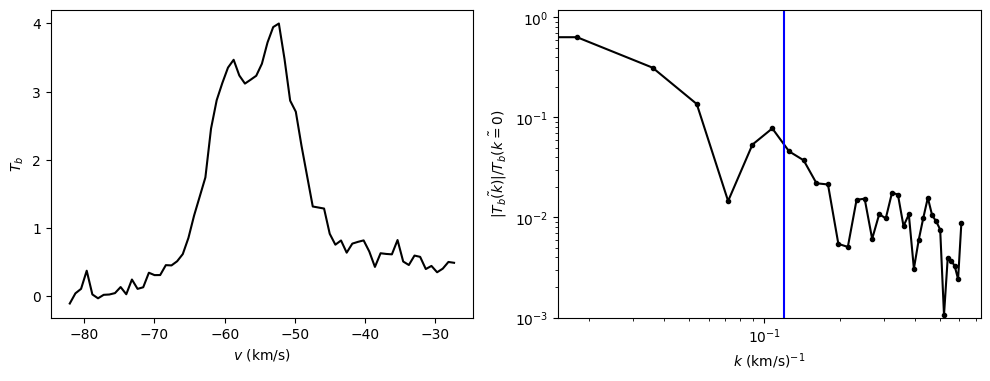

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
x = 39; y = 17
ax1.plot(v, cube[:,x,y], "-k")
ax1.set_ylabel(r"$T_b$")
ax1.set_xlabel(r"$v$ (km/s)")
ax2.plot(hfreqs, hsfft[:,x,y], ".-k")
ax2.plot([kcut, kcut], [0,2], "-b")
ax2.set_ylim([1.e-3,1.2])
# ax2.set_xlim(-70,-40)
ax2.set_ylabel(r"|$\tilde{T_b(k)}$|/$\tilde{T_b(k=0)}$")
ax2.set_xlabel(r"$k$ (km/s)$^{-1}$")
ax2.set_xscale("log")
ax2.set_yscale("log")

In [14]:
klim = np.where(np.sort(hfreqs) > kcut)[0][0]
print(klim, hfreqs[klim])
fcnm_low = np.max(hsfft[klim:],0)

7 0.1256763394186369


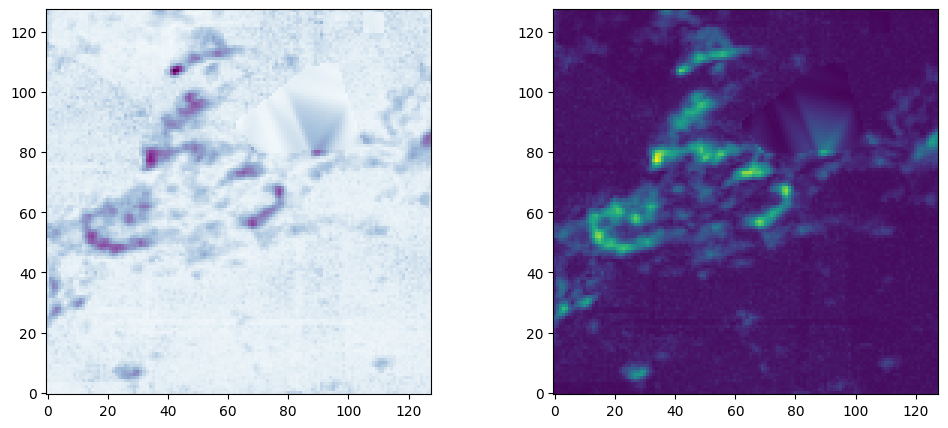

In [15]:
#Plot mass fraction map
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.imshow(fcnm_low, origin="lower", vmin=0.,
          cmap="BuPu")
ax2.imshow(fcnm_low*NHI, origin="lower", vmin=0.,
          cmap="viridis")

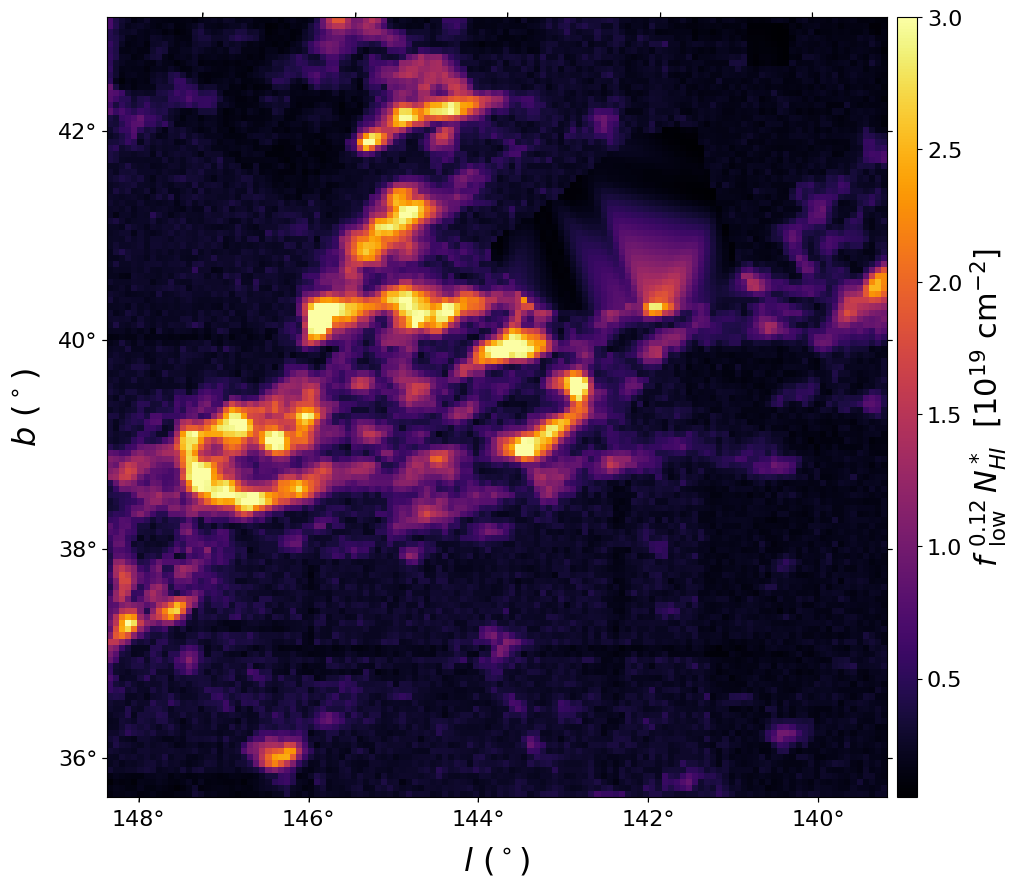

In [68]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1,0.1,0.78,0.8], projection=w)
ax.set_xlabel(r"$l \ (^\circ)$", fontsize=23.)
ax.set_ylabel(r"$b\ (^\circ)$", fontsize=23.)
ax.tick_params(labelsize = 16.)
cm_inf = plt.get_cmap('inferno')
cm_inf.set_bad(color='white')
cm_inf.set_under(color='black')
imkw_inf = dict(origin='lower', interpolation='none', cmap=cm_inf)
img = ax.imshow(fcnm_low*NHI, **imkw_inf, vmax=3.)
# plt.title("IVC CNM")
colorbar_ax = fig.add_axes([0.89, 0.11, 0.02, 0.78])
cbar = fig.colorbar(img, cax=colorbar_ax)
cbar.ax.tick_params(labelsize=16.)
cbar.set_label(r"$f\ ^{0.12}_{\rm low}\,N_{HI}^*$  [10$^{19}$ cm$^{-2}$]", fontsize=22.)
plt.savefig('NHI_CNM.pdf', format='pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()



# plt.imshow(fcnm_low*NHI, origin="lower",
#           cmap="inferno")
# # plt.title(str(name))
# plt.colorbar()

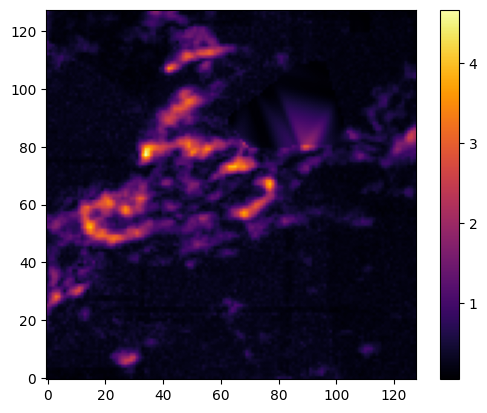

In [22]:
cnm_fft = np.where(fcnm_low*NHI != fcnm_low*NHI, 0, fcnm_low*NHI)

plt.imshow(cnm_fft, origin="lower",
          cmap="inferno")
# plt.title(str(name))
plt.colorbar()

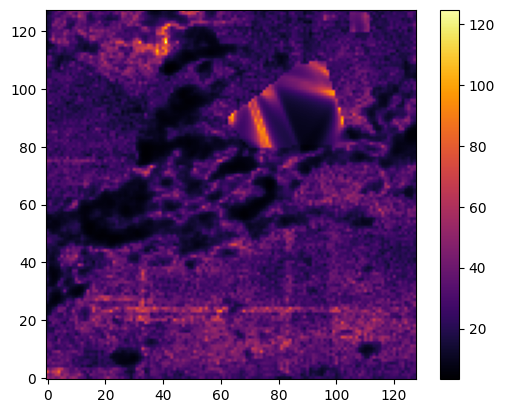

In [38]:
diff = cnm_fft/(np.max(cnm_fft)) - NHI/(np.max(NHI))

plt.imshow(NHI/cnm_fft, origin="lower",
          cmap="inferno")
# plt.title(str(name))
plt.colorbar()

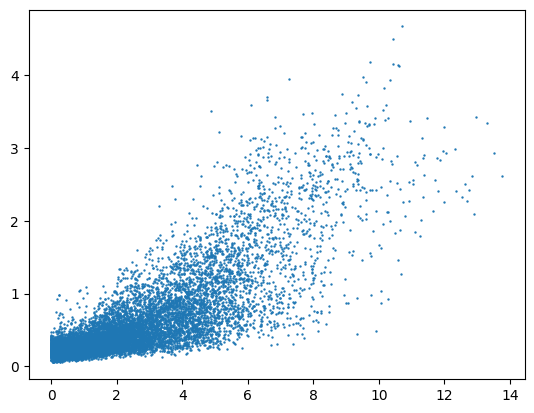

In [39]:
plt.scatter(NHI_cnmmodel.flatten(),cnm_fft.flatten(), s=0.5 )

In [40]:
# def f(x,a,b):
#   return a*x + b

def f(x,a):
  return a*x


from scipy.optimize import curve_fit
ydata = cnm_fft.flatten()
xdata = NHI_cnmmodel.flatten()
popt, pcov = curve_fit( f, xdata, ydata )

print(popt)

[0.2285028]


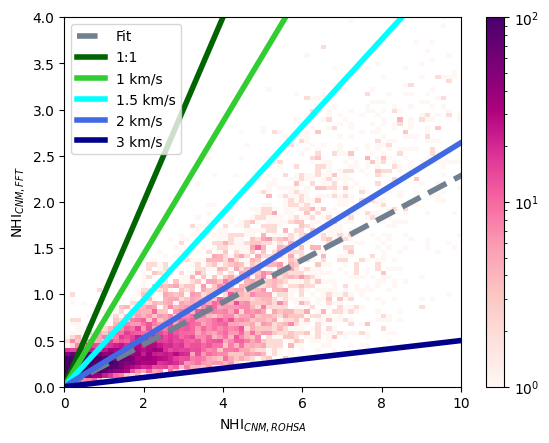

In [41]:
import matplotlib
x_sim = np.linspace(0,25,50)
# plt.scatter(NHI.flatten(),cnm_fft.flatten() )
plt.hist2d(NHI_cnmmodel.flatten(),cnm_fft.flatten(), cmap = 'RdPu', bins=100,norm=matplotlib.colors.LogNorm(vmax=100))
plt.plot(x_sim,f(x_sim, *popt), linewidth=4, color='slategrey',linestyle='--', label='Fit')
plt.plot(x_sim,f(x_sim, 1), linewidth=4, color='darkgreen', label='1:1')
plt.plot(x_sim,f(x_sim, 0.717), linewidth=4, color='limegreen', label='1 km/s')
plt.plot(x_sim,f(x_sim, 0.47), linewidth=4, color='cyan', label='1.5 km/s')
plt.plot(x_sim,f(x_sim, 0.26416), linewidth=4, color='royalblue', label='2 km/s')
plt.plot(x_sim,f(x_sim, 0.05), linewidth=4, color='darkblue', label='3 km/s')
plt.ylim(0,4)
plt.xlim(0,10)
plt.ylabel(r'NHI$_{CNM, FFT}$')
plt.xlabel(r'NHI$_{CNM, ROHSA}$')

plt.colorbar()
plt.legend()

In [42]:
const=3
print(np.exp(-0.3328*((2)**2)))

0.2641600789337457


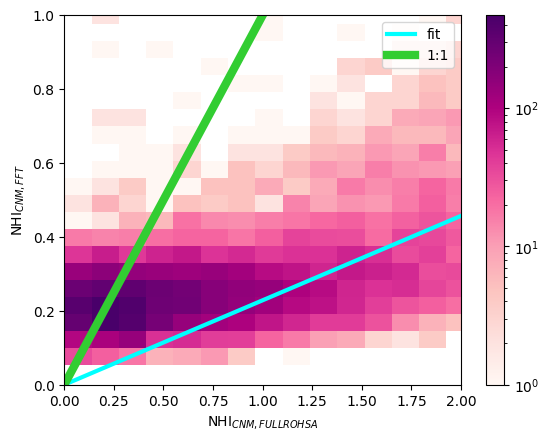

In [44]:
import matplotlib
x_sim = np.linspace(0,25,50)
# plt.scatter(NHI.flatten(),cnm_fft.flatten() )
plt.hist2d(NHI_cnmmodel.flatten(),cnm_fft.flatten(), cmap = 'RdPu', bins=100,norm=matplotlib.colors.LogNorm())
plt.plot(x_sim,f(x_sim, *popt), linewidth=3, color='cyan', label='fit')
plt.plot(x_sim,f(x_sim, 1), linewidth=6, color='limegreen', label='1:1')
plt.ylim(0,1)
plt.xlim(0,2)
plt.ylabel(r'NHI$_{CNM, FFT}$')
plt.xlabel(r'NHI$_{CNM, FULL ROHSA}$')

plt.colorbar()
plt.legend()


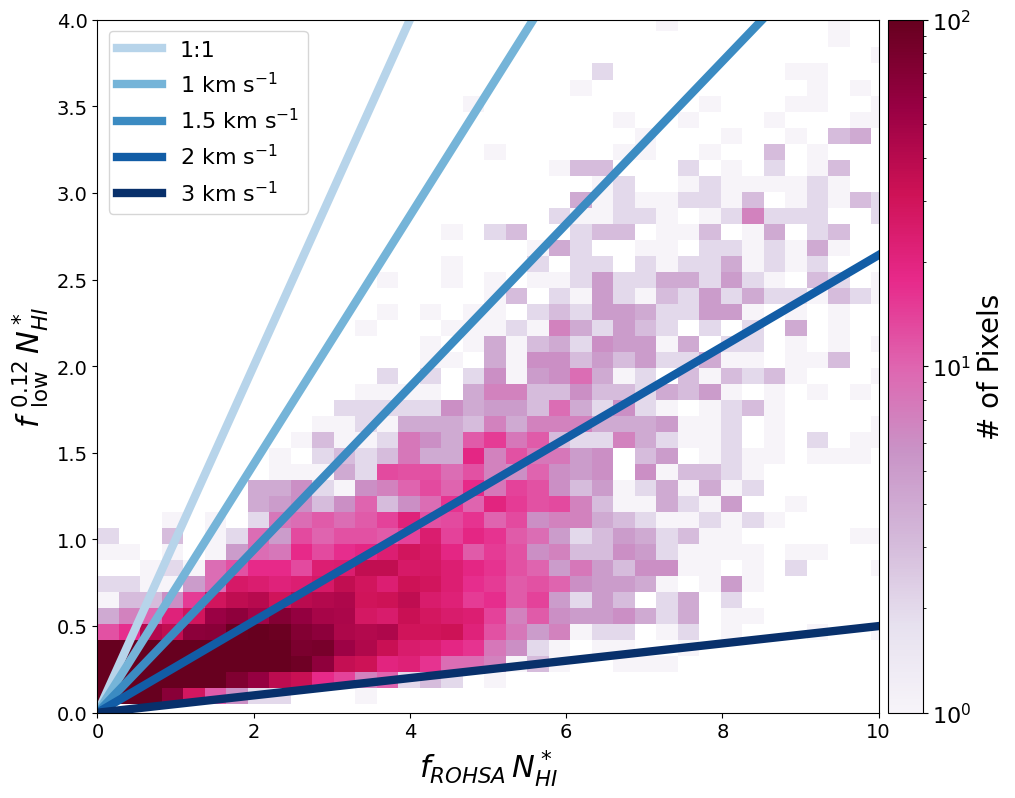

In [65]:
import matplotlib
import matplotlib.pylab as pl

n = 5
colors = pl.cm.Blues(np.linspace(0.3,1.,n))

plt.figure(figsize=(12.,9.))
ax = fig.add_subplot(111)
plt.xlabel(r'$f_{ROHSA}\, N_{HI}^*$', fontsize=22.)
plt.ylabel(r'$f\ ^{0.12}_{\rm low}\,N_{HI}^*$', fontsize=22.)
ax.tick_params(labelsize = 18.)
plt.hist2d(NHI_cnmmodel.flatten(),cnm_fft.flatten(), bins = 50, cmap="PuRd",norm=matplotlib.colors.LogNorm(vmax=100))
plt.plot(x_sim,f(x_sim, 1), linewidth=6, color=colors[0], label='1:1')
plt.plot(x_sim,f(x_sim, 0.717), linewidth=6, color=colors[1], label='1 km s$^{-1}$')
plt.plot(x_sim,f(x_sim, 0.47), linewidth=6, color=colors[2], label='1.5 km s$^{-1}$')
plt.plot(x_sim,f(x_sim, 0.26416), linewidth=6, color=colors[3], label='2 km s$^{-1}$')
plt.plot(x_sim,f(x_sim, 0.05), linewidth=6, color=colors[4], label='3 km s$^{-1}$')
plt.xlim(0,10)
plt.ylim(0,4)
# plt.colorbar(pad = 0.01, label = r'# of Pixels')
plt.tick_params(labelsize=14)
cbar=plt.colorbar(pad = 0.01)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(r'# of Pixels',size=20)

# plt.colorbar().set_label(label='# of Pixels',size=15,weight='bold')
plt.legend(loc='upper left',fontsize=16)
plt.savefig('comparison_frac_2dhist.pdf', format='pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()